In [1]:
%load_ext autoreload
%autoreload 2

import sys, os

sys.path.append(os.getcwd() + "/scripts/")
sys.path.append(os.getcwd())

from run_experiment import (generate_explanations, calculate_ensembles, get_filenames,
                            print_image, calculate_statistics, compute_score_table)
from statistics_record import AttrbutionsRecord
from sklearn.neural_network import BernoulliRBM

In [2]:
title = "mnist_test_2"
dataset = "mnist"
ensemble_name = "mnist_notebook_test2"

In [3]:
generate_explanations(title,
                      dataset,
                      ["IntegratedGradient white", "IntegratedGradient random1", "IntegratedGradient random 2", "IntegratedGradient random 3", "IntegratedGradient random 4", "IntegratedGradient random 5"], 10)


  0%|          | 0/10 [00:00<?, ?it/s]

simple_model loaded


100%|██████████| 10/10 [00:04<00:00,  2.38it/s]

100%|██████████| 10/10 [00:04<00:00,  2.34it/s]


Original image


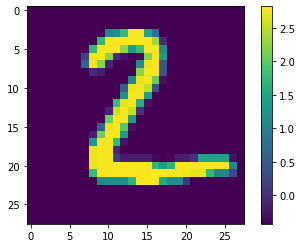

IntegratedGradient white


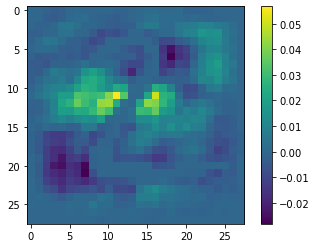

IntegratedGradient random1


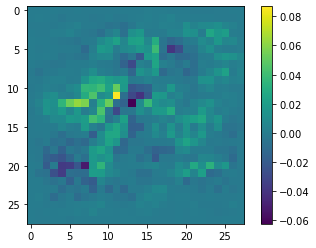

IntegratedGradient random 2


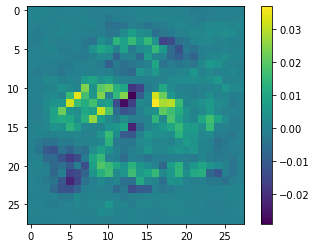

IntegratedGradient random 3


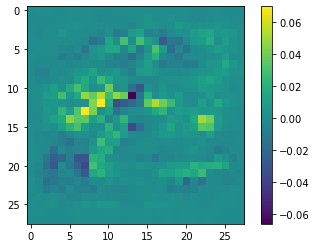

IntegratedGradient random 4


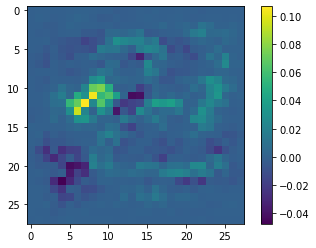

IntegratedGradient random 5


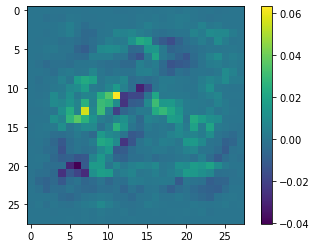

In [4]:
files = get_filenames(title, "individual_methods")
ar1 = AttrbutionsRecord.load(title, "individual_attribution", files[0])

image_id = 1
print_image(ar1.images[image_id].cpu().numpy(), "Original image")

for i, attr in enumerate(ar1.attributions[image_id]):
    print_image(attr, ar1.methods[i])

In [5]:
task1 = dict({
    "title": "mean",
    "technique": "mean",
    "individual_methods": [1, 1, 1, 1, 1, 1],
    "nr_noise": 0,
    "rbm": None,
})

task2 = dict({
    "title": "rbm",
    "technique": "rbm",
    "individual_methods": [1, 1, 1, 1, 1, 1],
    "nr_noise": 0,
    "rbm": [BernoulliRBM(n_components=1, batch_size=10, learning_rate=0.01, n_iter=100)]
})

calculate_ensembles(title, ensemble_name, [task1, task2], True)

100%|██████████| 3/3 [00:04<00:00,  1.51s/it]


mean


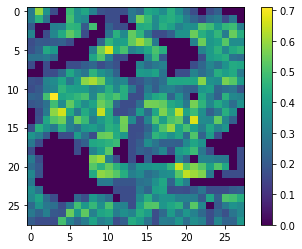

rbm


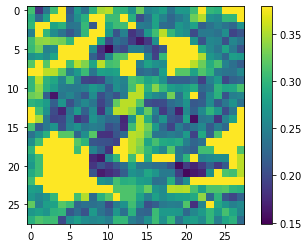

rbm flipped


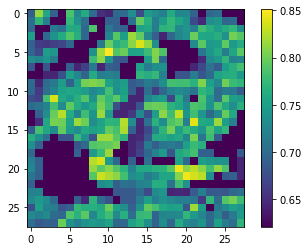

In [6]:
files = get_filenames(title, ensemble_name)
ar1 = AttrbutionsRecord.load(title, ensemble_name, files[0])

image_id = 1

for i, (attr, ensemble) in enumerate(ar1.get_ensemble_double_rbm(image_id)):
    print_image(attr, ensemble)

In [7]:
calculate_statistics(title, ensemble_name, True, True, True)

  0%|          | 0/3 [00:00<?, ?it/s]

simple_model loaded


100%|██████████| 3/3 [00:56<00:00, 18.80s/it]


In [8]:
df = compute_score_table(title, ensemble_name)
df

100%|██████████| 3/3 [00:00<00:00, 924.87it/s]


,Method,Insert Mean,Insert Std.,Delete Mean,Delete Std.,IROF Mean,IROF Std.
0,IntegratedGradient white,0.254457,0.117169,0.886281,0.058547,0.421721,0.113726
1,IntegratedGradient random1,0.930210,0.077923,0.223131,0.148214,0.151943,0.056964
2,IntegratedGradient random 2,0.928630,0.074211,0.274560,0.168214,0.136815,0.038646
3,IntegratedGradient random 3,0.936778,0.058405,0.217185,0.113718,0.159766,0.049480
4,IntegratedGradient random 4,0.939677,0.062289,0.226646,0.150694,0.159745,0.052196
5,IntegratedGradient random 5,0.930603,0.077632,0.202516,0.117186,0.145550,0.039207
6,mean,0.926761,0.064519,0.282789,0.110628,0.239462,0.067726
7,rbm,0.942338,0.057722,0.238622,0.131172,0.207498,0.100621
